
# 2020-0629 C6 Data Science Pipeline and Critical Thinking

=====

**Instructors**: Srikant Datar, Hanspeter Pfister, Joe Blitzstein <br/>
**Author**: Rashmi Banthia

=====

*Rashmi Banthia*


In [1]:
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, log_loss

from sklearn.metrics import confusion_matrix, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
#Read the dataset
df = pd.read_csv('pricemart_500_9500_hbap.csv')
df.shape

(10000, 21)

In [3]:
df.head()

,Apt,Birth Control,Body Pillow,Cigarettes,Female,Feminine Hygiene,Folic Acid,Ginger Ale,Home,Ice Cream,...,Maternity Clothes,PREGNANT,Pregnancy Test,Prenatal Vitamins,Prenatal Yoga,Sea Bands,Smoking Cessation,Stopped buying ciggies,Stopped buying wine,Wine
0,1,0,0,0,0,0,0,0,0,37,...,0,1,1,26,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,12,...,0,1,1,32,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,72,...,0,1,1,39,0,1,0,0,0,0
3,0,0,0,0,0,0,0,1,1,9,...,0,1,0,33,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,75,...,0,1,0,25,1,0,0,0,1,0


In [4]:
df.columns #features + target in the dataset

Index(['Apt', 'Birth Control', 'Body Pillow', 'Cigarettes', 'Female',
       'Feminine Hygiene', 'Folic Acid', 'Ginger Ale', 'Home', 'Ice Cream',
       'Male', 'Maternity Clothes', 'PREGNANT', 'Pregnancy Test',
       'Prenatal Vitamins', 'Prenatal Yoga', 'Sea Bands', 'Smoking Cessation',
       'Stopped buying ciggies', 'Stopped buying wine', 'Wine'],
      dtype='object')

In [5]:
predictors = ['Apt', 'Birth Control', 'Body Pillow', 'Cigarettes', 'Female',
       'Feminine Hygiene', 'Folic Acid', 'Ginger Ale', 'Home', 'Ice Cream',
       'Male', 'Maternity Clothes',  'Pregnancy Test',
       'Prenatal Vitamins', 'Prenatal Yoga', 'Sea Bands', 'Smoking Cessation',
       'Stopped buying ciggies', 'Stopped buying wine', 'Wine']
target = 'PREGNANT'

In [17]:
#Splitting the dataset into 80-20 i.e. 80% in training and 20% for validation
X_train, X_test, y_train, y_test = train_test_split(df[predictors],df.PREGNANT, 
                                                    test_size = 0.2, 
                                                    stratify = df.PREGNANT)


In [7]:
X_train.shape, X_test.shape #displays number of rows and columns in dataset

((8000, 20), (2000, 20))

In [8]:
y_train.value_counts(normalize=True) #Ratio of Pregnant vs. Non Pregnant  in the training data

0    0.95
1    0.05
Name: PREGNANT, dtype: float64

In [9]:
y_test.value_counts(normalize=True) #Ratio of Pregnant vs. Non Pregnant  in the test data

0    0.95
1    0.05
Name: PREGNANT, dtype: float64

In [10]:
df.PREGNANT.value_counts(normalize=True) #Ratio of Pregnant vs. Non Pregnant  in the full dataset.

0    0.95
1    0.05
Name: PREGNANT, dtype: float64

In [11]:
#Fit Logistic Regression model
clf = LogisticRegression(random_state=0, C=10000, max_iter=500, solver='lbfgs').fit(X_train, y_train)
preds = clf.predict_proba(X_test)[:,1]
print(accuracy_score(y_test, preds>0.5)) 
log_loss(y_test,preds)

0.9595


0.13564387166411698

### 5 fold CV

In [12]:
import numpy as np
from sklearn.model_selection import StratifiedKFold

In [18]:
# 5 fold cross validation - No holdout set 
skf = StratifiedKFold(n_splits=5,random_state=101, shuffle = True)
skf.get_n_splits(X_train, y_train)


for cvalue in [0.01, 1,1000,10000] :
    avg_log_loss = [] 
    for train_index, test_index in skf.split(X_train, y_train):

        X_train_fold, X_test_fold = X_train.iloc[train_index,:], X_train.iloc[test_index,:]
        y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]

        clf = LogisticRegression(random_state=0, C=cvalue, max_iter=500, solver='lbfgs').fit(X_train_fold, y_train_fold)
        preds = clf.predict_proba(X_test_fold)[:,1]
        #print(log_loss(y_test_fold,preds))
        avg_log_loss.append(log_loss(y_test_fold,preds))
    
    print("C =",cvalue, " \tLogloss 5 fold:", np.mean(avg_log_loss))


C = 0.01  	Logloss 5 fold: 0.1636178272252892
C = 1  	Logloss 5 fold: 0.13009100979968438
C = 1000  	Logloss 5 fold: 0.13002314534988807
C = 10000  	Logloss 5 fold: 0.13000928212021326


#C=1 or C=1000 or C=10000 are all comparable

In [20]:
clf = LogisticRegression(random_state=0, C=1, max_iter=500, solver='lbfgs').fit(X_train, y_train)
preds = clf.predict_proba(X_test)[:,1]
print(accuracy_score(y_test, preds>0.5))
log_loss(y_test,preds)

0.9605


0.13406938026290627

Confusion matrix, without normalization
[[1897    3]
 [  76   24]]
Normalized confusion matrix
[[0.99842105 0.00157895]
 [0.76       0.24      ]]


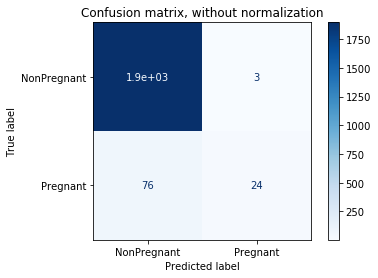

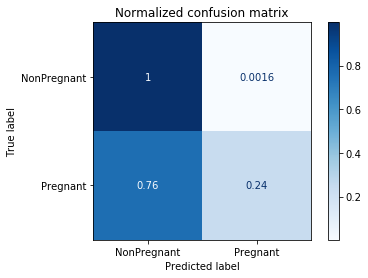

In [21]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=['NonPregnant','Pregnant'],
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)


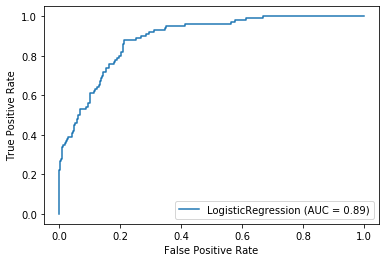

In [22]:
plot_roc_curve(clf, X_test, y_test);   
  